<div style="display: flex; text-align:center; background-color: #43B0DF;border: 1px solid RGB(51,165,182);" >
<h1 style="margin: auto; padding: 30px;margin-left: 2em;color:#fff; text-indent: -2em">Projet 4 -Realisez une etude de sous nutrition 
</h1>
</div>

<div style="border-style: double;border-width: 5px;border-color: #43B0DF;" >
<h3 style="margin: auto; padding: 10px ;margin-left: 4.5em;color:#43B0DF; text-indent: -4.5em">Ce programme est organisé en plusieurs partie :</h3>
       
  - 1. **[PRETRAITEMENT DES DONNEES](#1)**
     - 1. [Données d’insécurité alimentaire](#11)
     - 2. [Données des populations](#12)
     - 3. [Données des disponibilités alimentaire pour l'année 2013](#13)
     - 4. [Données d’aide alimentaire](#14)
  
  - 2. **[ANALYSES](#2)**
     - 1. [la proportion de personnes en état de sous-nutrition](#21)
     - 2. [le nombre théorique de personnes qui pourraient être nourries.](#22)
           1. [le nombre théorique de personnes qui pourraient être nourries par la production végétale.](#221)
     - 3. [Liste de Pays à aider dans l'urgence](#23)
    

<div style="background-color: #43B0DF;" >
<h2 style="margin: auto; padding: 20px; color:#fff;margin-left: 4.5em; text-indent: -4.5em">Partie 0 - Librairies et fonctions</h2>
</div>

<div style="border: 1px solid #43B0DF;" >
<h3 style="margin: auto; padding: 10px; color: #43B0DF;margin-left: 4.5em; text-indent: -4.5em">0.1 - Importation les librairies</h3>
</div>

In [1]:
#!pip install missingno

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

C:\Users\yteki\AppData\Roaming\Python\Python39\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


<div style="border: 1px solid #43B0DF;" >
<h3 style="margin: auto; padding: 10px; color: #43B0DF;margin-left: 4.5em; text-indent: -4.5em">0.2 - Déclaration des fonctions</h3>
</div>

<div style="background-color: #43B0DF;" >
<a id="1"><h2 style="margin: auto; padding: 20px; color:#fff;margin-left: 4.5em; text-indent: -4.5em">Partie 1 - PRETRAITEMENT DES DONNEES</h2></a>
</div>

<div style="border: 1px solid #43B0DF;" >
<a id="11"><h3 style="margin: auto; padding: 10px; color: #43B0DF;margin-left: 4.5em; text-indent: -4.5em">1.1 - Données d’insécurité alimentaire</h3></a>
</div>

In [3]:
sn = pd.read_csv('DATA\INPUT\sous_nutrition.csv',sep=',')
sn.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [4]:
sn['Année'] = pd.to_numeric(sn['Année'].str[0:4])+1
sn.head()

,Zone,Année,Valeur
0,Afghanistan,2013,8.6
1,Afghanistan,2014,8.8
2,Afghanistan,2015,8.9
3,Afghanistan,2016,9.7
4,Afghanistan,2017,10.5


In [5]:
sn.shape

(1218, 3)

In [6]:
sn.duplicated().value_counts()

False    1218
dtype: int64

In [7]:
sn.Valeur.value_counts()

<0.1     120
0.3       48
0.4       32
0.2       28
1.5       20
        ... 
3.7        1
24.1       1
189.2      1
190.1      1
8.3        1
Name: Valeur, Length: 139, dtype: int64

In [8]:
sn.replace('<0.1','0.1',inplace=True)

In [9]:
sn.dtypes

Zone      object
Année      int64
Valeur    object
dtype: object

In [10]:
sn['Valeur'] = pd.to_numeric(sn['Valeur'], errors='coerce')
sn.fillna(0, inplace=True)


In [11]:
# remplecement du nom de colonne valeur par un nom plus explicite "nbrDeSousAlimente"
sn.rename(columns={'Valeur':'nbrDeSousAlimente'},inplace=True)

In [12]:
sn.head(10)

,Zone,Année,nbrDeSousAlimente
0,Afghanistan,2013,8.6
1,Afghanistan,2014,8.8
2,Afghanistan,2015,8.9
3,Afghanistan,2016,9.7
4,Afghanistan,2017,10.5
5,Afghanistan,2018,11.1
6,Afrique du Sud,2013,2.2
7,Afrique du Sud,2014,2.5
8,Afrique du Sud,2015,2.8
9,Afrique du Sud,2016,3.0


In [13]:
sn.head()

,Zone,Année,nbrDeSousAlimente
0,Afghanistan,2013,8.6
1,Afghanistan,2014,8.8
2,Afghanistan,2015,8.9
3,Afghanistan,2016,9.7
4,Afghanistan,2017,10.5


In [14]:
# Convertion en unité
sn['nbrDeSousAlimente'] = sn['nbrDeSousAlimente'] * 1e6

<div style="border: 1px solid #43B0DF;" >
<a id="12"><h3 style="margin: auto; padding: 10px; color: #43B0DF;margin-left: 4.5em; text-indent: -4.5em">1.2 - Données de population</h3></a>
</div>

In [15]:
population = pd.read_csv('DATA\input\population.csv',sep=',')
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [16]:
# remplacement du nom de colonne valeur par un nom plus explicite
population.rename(columns={'Valeur':'Population'},inplace=True)
population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [17]:
population.shape

(1416, 3)

In [18]:
population.duplicated().value_counts() #Nous n'avons pas de doublons

False    1416
dtype: int64

In [19]:
# convertion en unité
population['Population'] = population.Population * 1e3


In [20]:
population.head(10)

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0
5,Afghanistan,2018,37171921.0
6,Afrique du Sud,2013,53687121.0
7,Afrique du Sud,2014,54544186.0
8,Afrique du Sud,2015,55386367.0
9,Afrique du Sud,2016,56207646.0


<div style="border: 1px solid #43B0DF;" >
<a id="13"><h3 style="margin: auto; padding: 10px; color: #43B0DF;margin-left: 4.5em; text-indent: -4.5em">1.3 - Données des disponibilités alimentaire pour l'année 2013</h3></a>
</div>

In [21]:
dispo_alim = pd.read_csv('DATA\input\dispo_alimentaire.csv',sep=',')

In [22]:
dispo_alim.shape

(15605, 18)

In [23]:
dispo_alim.dtypes

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

In [24]:
dispo_alim.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


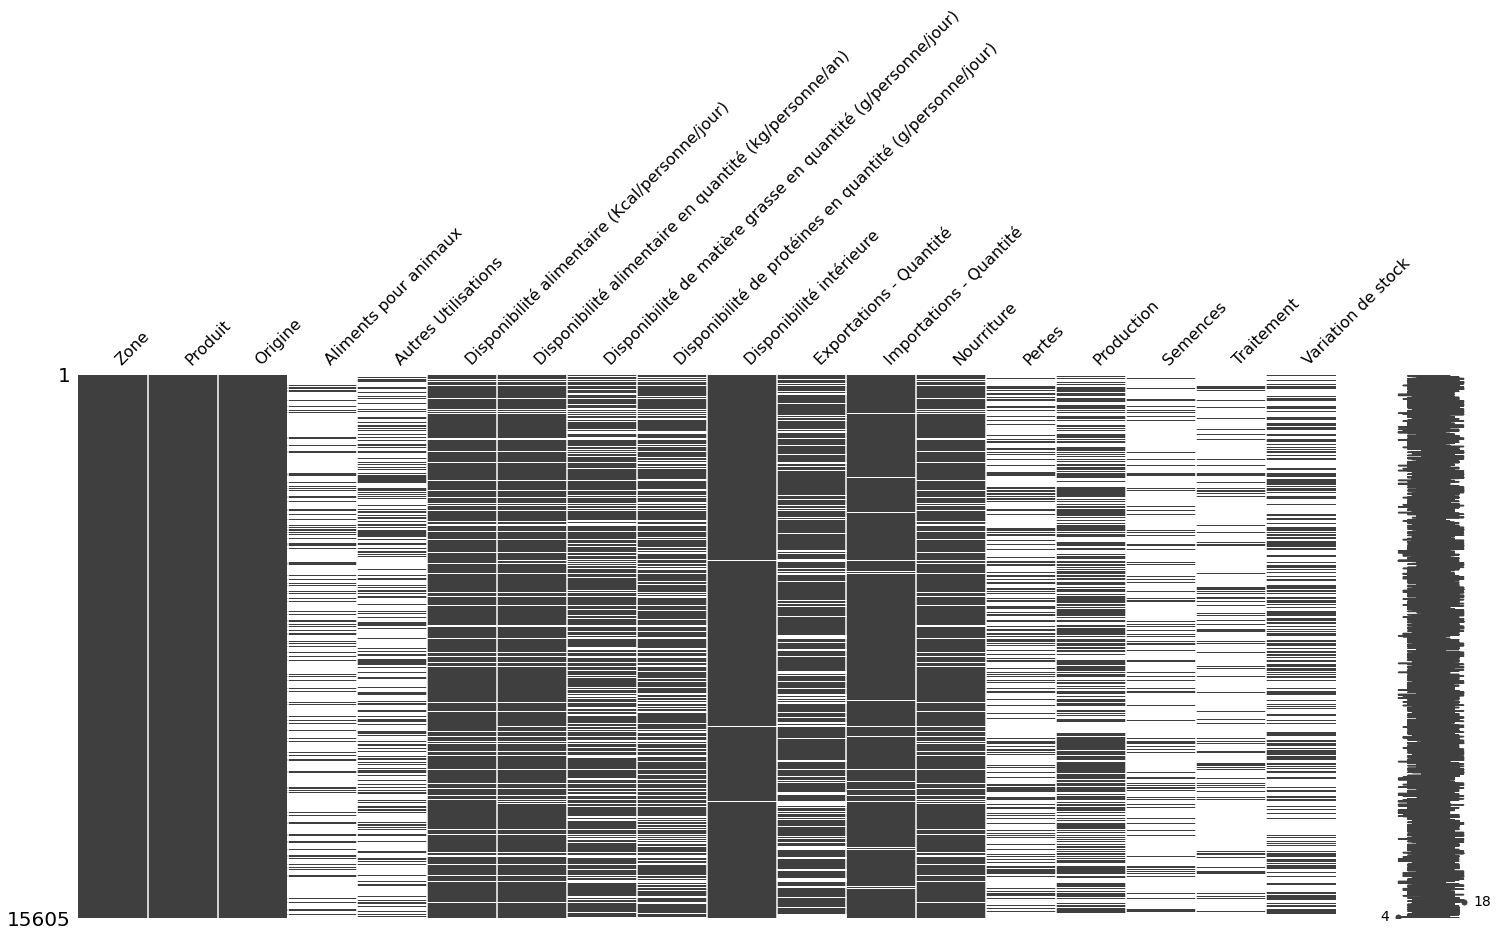

In [25]:
msno.matrix(dispo_alim)
plt.show()

In [26]:
dispo_alim.fillna(0,inplace=True) # mettre les valeur manquante a 0
dispo_alim.isnull().mean()

Zone                                                             0.0
Produit                                                          0.0
Origine                                                          0.0
Aliments pour animaux                                            0.0
Autres Utilisations                                              0.0
Disponibilité alimentaire (Kcal/personne/jour)                   0.0
Disponibilité alimentaire en quantité (kg/personne/an)           0.0
Disponibilité de matière grasse en quantité (g/personne/jour)    0.0
Disponibilité de protéines en quantité (g/personne/jour)         0.0
Disponibilité intérieure                                         0.0
Exportations - Quantité                                          0.0
Importations - Quantité                                          0.0
Nourriture                                                       0.0
Pertes                                                           0.0
Production                        

In [27]:
dispo_alim.columns

Index(['Zone', 'Produit', 'Origine', 'Aliments pour animaux',
       'Autres Utilisations', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation de stock'],
      dtype='object')

In [28]:
# conversion en kg
col_liste = ['Nourriture', 
             'Pertes', 
             'Aliments pour animaux', 
             'Disponibilité intérieure', 
             'Exportations - Quantité',
             'Production',
             'Importations - Quantité',  
             'Semences', 
             'Traitement', 
             'Variation de stock', 
             'Autres Utilisations']

for item in col_liste:
    dispo_alim[item] *= 1e6

In [29]:
# disponibilité sur l'année
dispo_alim['Disponibilité alimentaire (Kcal/personne/an)'] = dispo_alim['Disponibilité alimentaire (Kcal/personne/jour)'] * 365
dispo_alim['Disponibilité de matière grasse en quantité (kg/personne/an)'] = dispo_alim['Disponibilité de matière grasse en quantité (g/personne/jour)'] * 365 * 1e-3
dispo_alim['Disponibilité de protéines en quantité (kg/personne/an)'] = dispo_alim['Disponibilité de protéines en quantité (g/personne/jour)'] * 365 * 1e-3


In [30]:
dispo_alim.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité alimentaire (Kcal/personne/an),Disponibilité de matière grasse en quantité (kg/personne/an),Disponibilité de protéines en quantité (kg/personne/an)
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,...,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,1825.0,0.07300,0.28105
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,...,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,365.0,0.00365,0.00730
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,...,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,365.0,0.00365,0.01095
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,...,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,1460.0,0.00730,0.01825


<div style="border: 1px solid #43B0DF;" >
<a id="14"><h3 style="margin: auto; padding: 10px; color: #43B0DF;margin-left: 4.5em; text-indent: -4.5em">1.4 - Données d’aide alimentaire</h3></a>
</div>

In [31]:
aide_alimentaire = pd.read_csv('DATA\\input\\aide_alimentaire.csv',sep=',')
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [32]:
aide_alimentaire.shape

(1475, 4)

In [33]:
aide_alimentaire.duplicated().value_counts() #verification de doublons

False    1475
dtype: int64

In [34]:
aide_alimentaire.dtypes

Pays bénéficiaire    object
Année                 int64
Produit              object
Valeur                int64
dtype: object

In [35]:
aide_alimentaire.isnull().mean() #pas de valeurs nulles

Pays bénéficiaire    0.0
Année                0.0
Produit              0.0
Valeur               0.0
dtype: float64

In [36]:
aide_alimentaire['Quantité kg'] = aide_alimentaire['Valeur'] * 1e3
del aide_alimentaire["Valeur"]
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Quantité kg
0,Afghanistan,2013,Autres non-céréales,682000.0
1,Afghanistan,2014,Autres non-céréales,335000.0
2,Afghanistan,2013,Blé et Farin,39224000.0
3,Afghanistan,2014,Blé et Farin,15160000.0
4,Afghanistan,2013,Céréales,40504000.0



<div style="background-color: #43B0DF;" >
<a id="2"><h2 style="margin: auto; padding: 20px; color:#fff;margin-left: 4.5em; text-indent: -4.5em">Partie 2 - ANALYSES</h2></a>
</div>


<div style="border: 1px solid #43B0DF;" >
<a id="21"><h3 style="margin: auto; padding: 10px; color: #43B0DF;margin-left: 4.5em; text-indent: -4.5em">2.1 - la proportion de personnes en état de sous-nutrition</h3></a>
</div>

#### Methode 1 - calcul groupé (par Année)

In [37]:
sn.head()

,Zone,Année,nbrDeSousAlimente
0,Afghanistan,2013,8600000.0
1,Afghanistan,2014,8800000.0
2,Afghanistan,2015,8900000.0
3,Afghanistan,2016,9700000.0
4,Afghanistan,2017,10500000.0


In [38]:
population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


In [39]:
sn_pop = sn.merge(population,on = ['Zone','Année'])
sn_pop.head()

,Zone,Année,nbrDeSousAlimente,Population
0,Afghanistan,2013,8600000.0,32269589.0
1,Afghanistan,2014,8800000.0,33370794.0
2,Afghanistan,2015,8900000.0,34413603.0
3,Afghanistan,2016,9700000.0,35383032.0
4,Afghanistan,2017,10500000.0,36296113.0


In [40]:
sn_pop.isnull().mean()

Zone                 0.0
Année                0.0
nbrDeSousAlimente    0.0
Population           0.0
dtype: float64

In [41]:
sn_prevalence = sn_pop.groupby('Année').sum()
sn_prevalence.head(10)

,nbrDeSousAlimente,Population
Année,,
2013,530100000.0,7.206670e+09
2014,525600000.0,7.291347e+09
2015,526700000.0,7.375818e+09
2016,530600000.0,7.460004e+09
2017,537700000.0,7.543799e+09
2018,546100000.0,7.626986e+09


In [42]:
sn_prevalence['prevalence (%)'] = (sn_prevalence['nbrDeSousAlimente'] /sn_prevalence['Population'] ) *100
sn_prevalence.head(10)

,nbrDeSousAlimente,Population,prevalence (%)
Année,,,
2013,530100000.0,7.206670e+09,7.355686
2014,525600000.0,7.291347e+09,7.208545
2015,526700000.0,7.375818e+09,7.140903
2016,530600000.0,7.460004e+09,7.112597
2017,537700000.0,7.543799e+09,7.127709
2018,546100000.0,7.626986e+09,7.160102


<AxesSubplot:xlabel='Année', ylabel='prevalence (%)'>

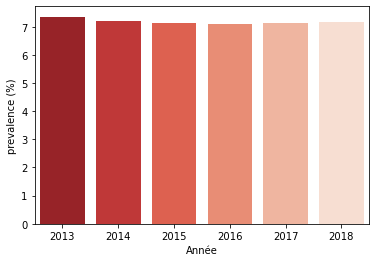

In [43]:
sns.barplot(x=sn_prevalence.index,y=sn_prevalence['prevalence (%)'],palette="Reds_r")

#### Methode 2 - prevalence par Année et par pays
        

In [44]:
sn_pop.head()

,Zone,Année,nbrDeSousAlimente,Population
0,Afghanistan,2013,8600000.0,32269589.0
1,Afghanistan,2014,8800000.0,33370794.0
2,Afghanistan,2015,8900000.0,34413603.0
3,Afghanistan,2016,9700000.0,35383032.0
4,Afghanistan,2017,10500000.0,36296113.0


In [45]:
# Prevalence de la sous nutrition par pays et par an entre 2013 et 2018
sn_pop['prevalence (%)'] = (sn_pop['nbrDeSousAlimente'] /sn_pop['Population'] ) *100
sn_pop.head(10)

,Zone,Année,nbrDeSousAlimente,Population,prevalence (%)
0,Afghanistan,2013,8600000.0,32269589.0,26.650479
1,Afghanistan,2014,8800000.0,33370794.0,26.370364
2,Afghanistan,2015,8900000.0,34413603.0,25.861866
3,Afghanistan,2016,9700000.0,35383032.0,27.414270
4,Afghanistan,2017,10500000.0,36296113.0,28.928718
5,Afghanistan,2018,11100000.0,37171921.0,29.861249
6,Afrique du Sud,2013,2200000.0,53687121.0,4.097817
7,Afrique du Sud,2014,2500000.0,54544186.0,4.583440
8,Afrique du Sud,2015,2800000.0,55386367.0,5.055396
9,Afrique du Sud,2016,3000000.0,56207646.0,5.337352


#### Methode 3 - Prevalence de la sous nutrition mondiale en 2017

In [46]:
psn = pd.merge(population.loc[population['Année'] == 2017,["Zone", "Population"]],
                               sn.loc[sn['Année'] == 2017,["Zone", "nbrDeSousAlimente"]],
                               on='Zone',how='outer',indicator=True)
psn.head()

,Zone,Population,nbrDeSousAlimente,_merge
0,Afghanistan,36296113.0,10500000.0,both
1,Afrique du Sud,57009756.0,3100000.0,both
2,Albanie,2884169.0,100000.0,both
3,Algérie,41389189.0,1300000.0,both
4,Allemagne,82658409.0,0.0,both


In [47]:
psn[psn._merge=='rigth_only']

,Zone,Population,nbrDeSousAlimente,_merge


In [48]:
psn[psn._merge=='left_only']

,Zone,Population,nbrDeSousAlimente,_merge
7,Anguilla,14584.0,NaN,left_only
9,Antilles néerlandaises (ex),275186.0,NaN,left_only
13,Aruba,105366.0,NaN,left_only
28,"Bonaire, Saint-Eustache et Saba",25401.0,NaN,left_only
53,Curaçao,161997.0,NaN,left_only
75,Gibraltar,33728.0,NaN,left_only
79,Guadeloupe,399672.0,NaN,left_only
80,Guam,164281.0,NaN,left_only
86,Guyane française,275191.0,NaN,left_only
90,Île de Man,83598.0,NaN,left_only


In [49]:
psn[psn._merge=="left_only"].Zone.to_list()

['Anguilla',
 'Antilles néerlandaises (ex)',
 'Aruba',
 'Bonaire, Saint-Eustache et Saba',
 'Curaçao',
 'Gibraltar',
 'Guadeloupe',
 'Guam',
 'Guyane française',
 'Île de Man',
 'Îles Anglo-Normandes',
 'Îles Caïmanes',
 'Îles Falkland (Malvinas)',
 'Îles Féroé',
 'Îles Mariannes du Nord',
 'Îles Turques-et-Caïques',
 'Îles Vierges américaines',
 'Îles Vierges britanniques',
 'Îles Wallis-et-Futuna',
 'Liechtenstein',
 'Martinique',
 'Mayotte',
 'Monaco',
 'Montserrat',
 'Réunion',
 'Sahara occidental',
 'Saint-Barthélemy',
 'Sainte-Hélène, Ascension et Tristan da Cunha',
 'Saint-Marin',
 'Saint-Martin (partie française)',
 'Saint-Pierre-et-Miquelon',
 'Saint-Siège',
 'Sint Maarten  (partie néerlandaise)']

#### Nous avons pas le nombre de sous alimenté pour les zones ci-dessous . Nous les excluons de l'analyse .

In [50]:
psn = pd.merge(population.loc[population['Année'] == 2017,["Zone", "Population"]],
                               sn.loc[sn['Année'] == 2017,["Zone", "nbrDeSousAlimente"]],
                               on='Zone')
psn.head()

,Zone,Population,nbrDeSousAlimente
0,Afghanistan,36296113.0,10500000.0
1,Afrique du Sud,57009756.0,3100000.0
2,Albanie,2884169.0,100000.0
3,Algérie,41389189.0,1300000.0
4,Allemagne,82658409.0,0.0


In [51]:
Tmp_var = psn['nbrDeSousAlimente'].sum()*100/psn['Population'].sum()

print("Prevalence de la sous nutrition en 2017 =", round(Tmp_var,2), " %")



Prevalence de la sous nutrition en 2017 = 7.13  %


In [52]:
anneesOfPopulation = population['Année'].unique()
print(anneesOfPopulation)

annesSousNutrition = sn['Année'].unique()
print(annesSousNutrition)

for i in range(len(anneesOfPopulation)):
    propSousNutrition = pd.merge(population.loc[population['Année'] == anneesOfPopulation[i],["Zone", "Population"]],
                               sn.loc[sn['Année'] == annesSousNutrition[i],["Zone", "nbrDeSousAlimente"]],
                               on='Zone')
    printString = "Proportion de personnes en état de sous nutrition ("+ str(anneesOfPopulation[i])+ "->"+ str(annesSousNutrition[i])+") : {:.2f}".format(propSousNutrition['nbrDeSousAlimente'].sum()*100/propSousNutrition['Population'].sum())+"%"
    if (str(anneesOfPopulation[i]) == '2017'):
        printString = "####--------> " + printString
    else :
        printString = "#### " + printString
    print(printString)

[2013 2014 2015 2016 2017 2018]
[2013 2014 2015 2016 2017 2018]
#### Proportion de personnes en état de sous nutrition (2013->2013) : 7.36%
#### Proportion de personnes en état de sous nutrition (2014->2014) : 7.21%
#### Proportion de personnes en état de sous nutrition (2015->2015) : 7.14%
#### Proportion de personnes en état de sous nutrition (2016->2016) : 7.11%
####--------> Proportion de personnes en état de sous nutrition (2017->2017) : 7.13%
#### Proportion de personnes en état de sous nutrition (2018->2018) : 7.16%



<div style="border: 1px solid #43B0DF;" >
<a id="22"><h3 style="margin: auto; padding: 10px; color: #43B0DF;margin-left: 4.5em; text-indent: -4.5em">2.2 - le nombre théorique de personnes qui pourraient être nourries.</h3></a>
</div>

In [53]:
dispo_alim.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité alimentaire (Kcal/personne/an),Disponibilité de matière grasse en quantité (kg/personne/an),Disponibilité de protéines en quantité (kg/personne/an)
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,...,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,1825.0,0.07300,0.28105
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,...,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,365.0,0.00365,0.00730
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,...,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,365.0,0.00365,0.01095
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,...,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,1460.0,0.00730,0.01825


In [54]:
# le nombre de kilocalorie necessaire a un homme annuellement est de nkcal = 2500 * 365
nkcal = 2500 * 365

In [55]:
dispo_alim_pop = pd.merge(dispo_alim.groupby('Zone').sum(),population.loc[population['Année'] == 2017,['Zone','Population']],on='Zone',how='outer',indicator=True)

In [56]:
dispo_alim_pop[dispo_alim_pop._merge=="left_only"]

,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,...,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité alimentaire (Kcal/personne/an),Disponibilité de matière grasse en quantité (kg/personne/an),Disponibilité de protéines en quantité (kg/personne/an),Population,_merge
126,Royaume-Uni,1.351600e+10,5.191000e+09,3425.0,969.69,138.24,103.14,9.569500e+10,1.317700e+10,4.319600e+10,...,1.144000e+09,6.760200e+10,935000000.0,1.342600e+10,-1.926000e+09,1250125.0,50.4576,37.64610,NaN,left_only
152,Tchéquie (la),2.727000e+09,1.061000e+09,3255.0,865.54,137.02,87.41,1.937200e+10,6.982000e+09,5.512000e+09,...,2.710000e+08,2.071400e+10,429000000.0,5.620000e+09,1.290000e+08,1188075.0,50.0123,31.90465,NaN,left_only


In [57]:
dispo_alim_pop.loc[dispo_alim_pop.Zone=="Royaume-Uni","Population"]=66040229
dispo_alim_pop.loc[dispo_alim_pop.Zone=="Tchéquie (la)","Population"]=10600000

In [58]:
dispo_alim_pop[dispo_alim_pop._merge=="left_only"]

,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,...,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité alimentaire (Kcal/personne/an),Disponibilité de matière grasse en quantité (kg/personne/an),Disponibilité de protéines en quantité (kg/personne/an),Population,_merge
126,Royaume-Uni,1.351600e+10,5.191000e+09,3425.0,969.69,138.24,103.14,9.569500e+10,1.317700e+10,4.319600e+10,...,1.144000e+09,6.760200e+10,935000000.0,1.342600e+10,-1.926000e+09,1250125.0,50.4576,37.64610,66040229.0,left_only
152,Tchéquie (la),2.727000e+09,1.061000e+09,3255.0,865.54,137.02,87.41,1.937200e+10,6.982000e+09,5.512000e+09,...,2.710000e+08,2.071400e+10,429000000.0,5.620000e+09,1.290000e+08,1188075.0,50.0123,31.90465,10600000.0,left_only


In [59]:
dispo_alim_pop[dispo_alim_pop._merge=="rigth_only"]

,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,...,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité alimentaire (Kcal/personne/an),Disponibilité de matière grasse en quantité (kg/personne/an),Disponibilité de protéines en quantité (kg/personne/an),Population,_merge


In [60]:
dispo_alim_pop['Disponibilé alimentaire totale'] = dispo_alim_pop['Disponibilité alimentaire (Kcal/personne/an)'] * dispo_alim_pop['Population']


In [61]:
nbre_personnes_nourris = round(((dispo_alim_pop['Disponibilé alimentaire totale'].sum() ) / (nkcal )))
dispo_alim_total = dispo_alim_pop['Disponibilé alimentaire totale'].sum()
proportion = (nbre_personnes_nourris/ dispo_alim_pop['Population'].sum())*100
print("dispo alimentaire totale en kcal ( 2017 ) :",dispo_alim_total,'kcal')
print("Total d'être humain pouvant être nourris :",nbre_personnes_nourris)
print('Proportion :',round(proportion,2),'%')

dispo alimentaire totale en kcal ( 2017 ) : 7730581525254440.0 kcal
Total d'être humain pouvant être nourris : 8471870165
Proportion : 111.11 %


<div style="border: 1px solid #43B0DF;" >
<a id="221"><h4 style="margin: auto; padding: 10px; color: #43B0DF;margin-left: 4.5em; text-indent: -4.5em">2.2.1 - le nombre théorique de personnes qui pourraient être nourries avec les produits végétaux.</h4></a>
</div>

In [62]:
dispo_alim_vegetaux = pd.merge(dispo_alim.loc[dispo_alim.Origine == 'vegetale',:].groupby('Zone').sum(),population.loc[population['Année'] == 2017,['Zone','Population']],on='Zone',how='left',indicator=True)

In [63]:
df = dispo_alim_vegetaux[dispo_alim_vegetaux['_merge']!='both']
print(df.shape)

(2, 21)


In [64]:
#del dispo_alim_vegetaux['_merge']

In [65]:
df[df._merge=='right_only']

,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,...,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité alimentaire (Kcal/personne/an),Disponibilité de matière grasse en quantité (kg/personne/an),Disponibilité de protéines en quantité (kg/personne/an),Population,_merge


In [66]:
df[df._merge=='left_only']


,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,...,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité alimentaire (Kcal/personne/an),Disponibilité de matière grasse en quantité (kg/personne/an),Disponibilité de protéines en quantité (kg/personne/an),Population,_merge
126,Royaume-Uni,1.192500e+10,4.273000e+09,2443.0,616.08,64.67,44.87,7.047200e+10,8.012000e+09,3.260700e+10,...,1.119000e+09,4.781900e+10,859000000.0,1.322700e+10,-1.940000e+09,891695.0,23.60455,16.37755,NaN,left_only
152,Tchéquie (la),2.637000e+09,8.790000e+08,2418.0,561.13,74.14,36.92,1.573700e+10,5.457000e+09,4.062000e+09,...,1.800000e+08,1.700700e+10,417000000.0,5.620000e+09,1.280000e+08,882570.0,27.06110,13.47580,NaN,left_only


### Analyse de la jointure
Nous pouvons constater que certaines Zones n'ont pas de données de population et certaines Zones n'ont pas de données de bilan alimentaire d'origine végetale. Nous decidons d'exclure ces pays de l'analyse . 

In [67]:
dispo_alim_vegetaux.loc[dispo_alim_vegetaux.Zone=="Royaume-Uni","Population"]=66040229
dispo_alim_vegetaux.loc[dispo_alim_vegetaux.Zone=="Tchéquie (la)","Population"]=10600000

In [68]:
dispo_alim_vegetaux['Disponibilé alimentaire totale'] = dispo_alim_vegetaux['Disponibilité alimentaire (Kcal/personne/an)'] * dispo_alim_vegetaux['Population']


In [69]:
nbre_personnes_nourris_vegetaux = round(((dispo_alim_vegetaux['Disponibilé alimentaire totale'].sum() ) / (nkcal )))
dispo_alim_vegetaux_total = dispo_alim_vegetaux['Disponibilé alimentaire totale'].sum()
proportion_vegetaux = (nbre_personnes_nourris_vegetaux/ dispo_alim_vegetaux['Population'].sum())*100
print("dispo alimentaire totale en kcal ( 2013 ) :",dispo_alim_vegetaux_total,'kcal')
print("Total d'être humain pouvant être nourris :",nbre_personnes_nourris_vegetaux)
print('Proportion :',round(proportion_vegetaux,2),'%')

dispo alimentaire totale en kcal ( 2013 ) : 6368421921196020.0 kcal
Total d'être humain pouvant être nourris : 6979092516
Proportion : 94.71 %


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); "> - Q : </h3>
    <div style="margin: auto;padding-left: 40px;padding-bottom: 20px;margin-left: 1.5em; text-indent: -1.5em;">
        <lu>
            <li>utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine</li>
        </lu>
    </div>
</div>

In [70]:
dispo_alim.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité alimentaire (Kcal/personne/an),Disponibilité de matière grasse en quantité (kg/personne/an),Disponibilité de protéines en quantité (kg/personne/an)
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,...,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,1825.0,0.07300,0.28105
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,...,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,365.0,0.00365,0.00730
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,...,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,365.0,0.00365,0.01095
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,...,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,1460.0,0.00730,0.01825


In [71]:

dispo_interieure = dispo_alim['Disponibilité intérieure'].sum()
print(type(dispo_interieure))
print(dispo_interieure)

Prop_Cumul = 0
for elt in ['Aliments pour animaux', 'Pertes', 'Nourriture', 'Semences', 'Traitement', 'Autres Utilisations']:
    VProportion = ((dispo_alim[elt].sum()*100)/dispo_interieure)
    VProportion = int(VProportion*1000)/1000
    print("Proportion de", elt, ":", "{:.5f}".format(VProportion), "%")
    Prop_Cumul = Prop_Cumul + VProportion

print("Total proportion : ", elt, ":", "{:.5f}".format(Prop_Cumul), "%")



<class 'numpy.float64'>
9848994000000.0
Proportion de Aliments pour animaux : 13.24200 %
Proportion de Pertes : 4.60600 %
Proportion de Nourriture : 49.51000 %
Proportion de Semences : 1.57000 %
Proportion de Traitement : 22.38400 %
Proportion de Autres Utilisations : 8.78200 %
Total proportion :  Autres Utilisations : 100.09400 %


In [72]:
# Calcul des proportions
proportions = {}
Prop_Cumul = 0
for elt in ['Aliments pour animaux', 'Pertes', 'Nourriture', 'Semences', 'Traitement', 'Autres Utilisations']:
    VProportion = ((dispo_alim[elt].sum() * 100) / dispo_interieure)
    VProportion = int(VProportion * 1000) / 1000  # Arrondi à 3 décimales
    proportions[elt] = VProportion
    Prop_Cumul += VProportion

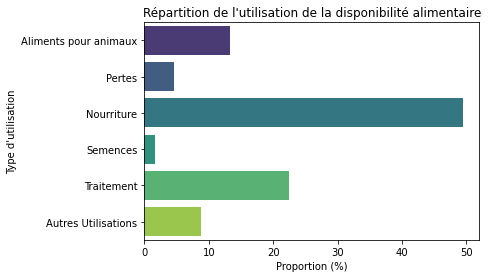

In [73]:

df_proportions = pd.DataFrame(proportions.items(), columns=['Utilisation', 'Proportion'])

# Création de graphique en barres
sns.barplot(data=df_proportions, x='Proportion', y='Utilisation', palette='viridis')

# Ajout les labels et le titre
plt.xlabel('Proportion (%)')
plt.ylabel('Type d\'utilisation')
plt.title('Répartition de l\'utilisation de la disponibilité alimentaire')
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); "> - Q1 : </h3>
    <div style="margin: auto;padding-left: 40px;padding-bottom: 20px;margin-left: 1.5em; text-indent: -1.5em;">
        <lu>
            <li>lien logique entre l’ensemble des 10 variables exprimées en milliers de tonnes sur les utilisations de la disponibilité intérieure</li>
        </lu>
    </div>
</div>

De manière générale On peut écrire l'équation: Production + Importations_Quantite - Exportations_Quantite + Variation_de_stock = Disponibilité_intérieure = Nourriture + Aliments_pour_animaux + Semences + Pertes + Autre_Utilisations + Traitement

Prenons pour illustration le cas du blé en France.

In [74]:
ble_france =  dispo_alim.loc[(dispo_alim['Produit']=="Blé")&(dispo_alim['Zone']=="France")]
ble_france

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité alimentaire (Kcal/personne/an),Disponibilité de matière grasse en quantité (kg/personne/an),Disponibilité de protéines en quantité (kg/personne/an)
4851,France,Blé,vegetale,7.822000e+09,2.824000e+09,811.0,108.43,4.2,25.99,2.029800e+10,...,2.055000e+09,6.971000e+09,358000000.0,3.861400e+10,748000000.0,1.575000e+09,1.131000e+09,296015.0,1.533,9.48635


In [75]:

ble_france =  dispo_alim.loc[(dispo_alim['Produit']=="Blé")&(dispo_alim['Zone']=="France")].iloc[0]


eq_1 = ble_france["Production"] + ble_france["Importations - Quantité"] + ble_france["Variation de stock"] - ble_france["Exportations - Quantité"]
eq_2 = ble_france["Nourriture"] + ble_france["Pertes"] + ble_france["Semences"] + ble_france["Traitement"] + ble_france['Aliments pour animaux'] + ble_france['Autres Utilisations']

print("La disponibilité interieur = Production + Importation quantité + Variation de stock - Exportation :",eq_1)
print("La disponibilité interieur = Semences+Pertes+Nourriture+Aliment pour animaux+Traitement+Autres utilisations :",eq_2)
print("C'est la bonne equation", ble_france["Disponibilité intérieure"])


La disponibilité interieur = Production + Importation quantité + Variation de stock - Exportation : 20298000000.0
La disponibilité interieur = Semences+Pertes+Nourriture+Aliment pour animaux+Traitement+Autres utilisations : 20298000000.0
C'est la bonne equation 20298000000.0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); "> - Q2 : </h3>
    <div style="margin: auto;padding-left: 40px;padding-bottom: 20px;margin-left: 1.5em; text-indent: -1.5em;">
        <lu>
            <li>la répartition entre l’alimentation humaine et l’alimentation pour animaux en cereal</li>
        </lu>
    </div>
</div>

In [76]:
dispo_alim.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité alimentaire (Kcal/personne/an),Disponibilité de matière grasse en quantité (kg/personne/an),Disponibilité de protéines en quantité (kg/personne/an)
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,...,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,1825.0,0.07300,0.28105
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,...,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,365.0,0.00365,0.00730
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,...,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,365.0,0.00365,0.01095
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,...,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,1460.0,0.00730,0.01825


In [77]:
dispo_alim.loc[dispo_alim['Produit']=='Blé',:]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité alimentaire (Kcal/personne/an),Disponibilité de matière grasse en quantité (kg/personne/an),Disponibilité de protéines en quantité (kg/personne/an)
7,Afghanistan,Blé,vegetale,0.000000e+00,0.000000e+00,1369.0,160.23,4.69,36.91,5.992000e+09,...,1.173000e+09,4.895000e+09,775000000.0,5.169000e+09,3.220000e+08,0.0,-3.500000e+08,499685.0,1.71185,13.47215
72,Afrique du Sud,Blé,vegetale,3.700000e+07,0.000000e+00,492.0,60.13,2.09,15.40,3.316000e+09,...,1.490000e+09,3.174000e+09,74000000.0,1.870000e+09,3.100000e+07,0.0,4.500000e+08,179580.0,0.76285,5.62100
167,Albanie,Blé,vegetale,1.800000e+07,1.300000e+08,1056.0,138.64,5.85,33.64,6.500000e+08,...,3.600000e+08,4.400000e+08,44000000.0,2.940000e+08,1.800000e+07,0.0,0.000000e+00,385440.0,2.13525,12.27860
259,Algérie,Blé,vegetale,5.450000e+08,8.200000e+08,1424.0,185.42,5.34,42.97,9.461000e+09,...,6.343000e+09,7.270000e+09,672000000.0,3.299000e+09,1.530000e+08,0.0,-1.800000e+08,519760.0,1.94910,15.68405
352,Allemagne,Blé,vegetale,7.494000e+09,7.740000e+08,654.0,83.41,2.59,21.17,1.649100e+10,...,5.421000e+09,6.900000e+09,663000000.0,2.501900e+10,5.710000e+08,90000000.0,-3.079000e+09,238710.0,0.94535,7.72705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15164,Émirats arabes unis,Blé,vegetale,5.100000e+07,7.500000e+07,816.0,101.29,4.55,23.69,1.282000e+09,...,2.016000e+09,9.470000e+08,209000000.0,0.000000e+00,0.000000e+00,0.0,-4.920000e+08,297840.0,1.66075,8.64685
15257,Équateur,Blé,vegetale,1.000000e+06,3.000000e+06,302.0,39.19,1.32,7.94,6.230000e+08,...,6.090000e+08,6.170000e+08,1000000.0,6.000000e+06,2.000000e+06,0.0,1.300000e+07,110230.0,0.48180,2.89810
15352,États-Unis d'Amérique,Blé,vegetale,6.196000e+09,1.600000e+07,599.0,80.43,2.85,19.35,3.405100e+10,...,5.491000e+09,2.574200e+10,0.0,5.796700e+10,2.096000e+09,0.0,5.284000e+09,218635.0,1.04025,7.06275
15445,Éthiopie,Blé,vegetale,0.000000e+00,1.600000e+09,284.0,31.26,0.88,8.47,4.906000e+09,...,8.680000e+08,2.942000e+09,245000000.0,4.039000e+09,1.190000e+08,0.0,3.000000e+06,103660.0,0.32120,3.09155


In [78]:
#df_cereal = pd.read_csv('faostat_cereal.csv')
#df_cereal.head()

In [79]:
#df_cereal['Produit'].value_counts()

In [80]:
df_cereales = pd.read_excel('DATA\input\FAOSTAT_DATA_CEREALES.xls')
df_cereales.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBSH,"Bilans Alimentaires (-2013, ancienne méthodolo...",2,Afghanistan,5511,Production,2511,Blé et produits,2013,2013,Milliers de tonnes,5169,S,Données standardisées
1,FBSH,"Bilans Alimentaires (-2013, ancienne méthodolo...",2,Afghanistan,5511,Production,2805,Riz (Eq Blanchi),2013,2013,Milliers de tonnes,342,S,Données standardisées
2,FBSH,"Bilans Alimentaires (-2013, ancienne méthodolo...",2,Afghanistan,5511,Production,2513,Orge et produits,2013,2013,Milliers de tonnes,514,S,Données standardisées
3,FBSH,"Bilans Alimentaires (-2013, ancienne méthodolo...",2,Afghanistan,5511,Production,2514,Maïs et produits,2013,2013,Milliers de tonnes,312,S,Données standardisées
4,FBSH,"Bilans Alimentaires (-2013, ancienne méthodolo...",2,Afghanistan,5511,Production,2517,Millet et produits,2013,2013,Milliers de tonnes,13,S,Données standardisées


In [81]:
cer = df_cereales.Produit
cer

0         Blé et produits
1        Riz (Eq Blanchi)
2        Orge et produits
3        Maïs et produits
4      Millet et produits
              ...        
895      Maïs et produits
896                Avoine
897    Millet et produits
898    Sorgho et produits
899      Céréales, Autres
Name: Produit, Length: 900, dtype: object

In [82]:
liste_cer = []
for row in cer:
    split_row = row.split()
    liste_cer.append(split_row)
print(liste_cer)

[['Blé', 'et', 'produits'], ['Riz', '(Eq', 'Blanchi)'], ['Orge', 'et', 'produits'], ['Maïs', 'et', 'produits'], ['Millet', 'et', 'produits'], ['Blé', 'et', 'produits'], ['Riz', '(Eq', 'Blanchi)'], ['Orge', 'et', 'produits'], ['Maïs', 'et', 'produits'], ['Seigle', 'et', 'produits'], ['Avoine'], ['Millet', 'et', 'produits'], ['Sorgho', 'et', 'produits'], ['Céréales,', 'Autres'], ['Blé', 'et', 'produits'], ['Riz', '(Eq', 'Blanchi)'], ['Orge', 'et', 'produits'], ['Maïs', 'et', 'produits'], ['Seigle', 'et', 'produits'], ['Avoine'], ['Sorgho', 'et', 'produits'], ['Blé', 'et', 'produits'], ['Riz', '(Eq', 'Blanchi)'], ['Orge', 'et', 'produits'], ['Maïs', 'et', 'produits'], ['Avoine'], ['Sorgho', 'et', 'produits'], ['Céréales,', 'Autres'], ['Blé', 'et', 'produits'], ['Orge', 'et', 'produits'], ['Maïs', 'et', 'produits'], ['Seigle', 'et', 'produits'], ['Avoine'], ['Céréales,', 'Autres'], ['Blé', 'et', 'produits'], ['Riz', '(Eq', 'Blanchi)'], ['Maïs', 'et', 'produits'], ['Millet', 'et', 'produits

In [83]:
liste = []
for row in liste_cer:
    liste.append(row[0])
print(liste)

['Blé', 'Riz', 'Orge', 'Maïs', 'Millet', 'Blé', 'Riz', 'Orge', 'Maïs', 'Seigle', 'Avoine', 'Millet', 'Sorgho', 'Céréales,', 'Blé', 'Riz', 'Orge', 'Maïs', 'Seigle', 'Avoine', 'Sorgho', 'Blé', 'Riz', 'Orge', 'Maïs', 'Avoine', 'Sorgho', 'Céréales,', 'Blé', 'Orge', 'Maïs', 'Seigle', 'Avoine', 'Céréales,', 'Blé', 'Riz', 'Maïs', 'Millet', 'Sorgho', 'Maïs', 'Blé', 'Riz', 'Orge', 'Maïs', 'Millet', 'Sorgho', 'Blé', 'Riz', 'Orge', 'Maïs', 'Seigle', 'Avoine', 'Millet', 'Sorgho', 'Céréales,', 'Blé', 'Orge', 'Maïs', 'Seigle', 'Avoine', 'Céréales,', 'Blé', 'Riz', 'Orge', 'Maïs', 'Seigle', 'Avoine', 'Millet', 'Sorgho', 'Céréales,', 'Blé', 'Orge', 'Maïs', 'Seigle', 'Avoine', 'Millet', 'Sorgho', 'Céréales,', 'Blé', 'Riz', 'Orge', 'Maïs', 'Seigle', 'Avoine', 'Millet', 'Sorgho', 'Maïs', 'Blé', 'Riz', 'Orge', 'Maïs', 'Millet', 'Sorgho', 'Maïs', 'Blé', 'Orge', 'Maïs', 'Seigle', 'Avoine', 'Céréales,', 'Blé', 'Orge', 'Maïs', 'Seigle', 'Avoine', 'Céréales,', 'Riz', 'Maïs', 'Sorgho', 'Riz', 'Maïs', 'Millet', '

In [84]:
cer

0         Blé et produits
1        Riz (Eq Blanchi)
2        Orge et produits
3        Maïs et produits
4      Millet et produits
              ...        
895      Maïs et produits
896                Avoine
897    Millet et produits
898    Sorgho et produits
899      Céréales, Autres
Name: Produit, Length: 900, dtype: object

In [85]:
liste = pd.DataFrame(liste)

In [86]:
cereales = pd.concat([liste,cer],ignore_index=True)

In [87]:
cereales.drop_duplicates(inplace=True)

In [88]:
cereales

,0
0,Blé
1,Riz
2,Orge
3,Maïs
4,Millet
9,Seigle
10,Avoine
12,Sorgho
13,"Céréales,"
900,Blé et produits


In [89]:
cereales.drop(13,inplace=True)
cereales = cereales.rename(columns={0:'Produit'})
cereales

,Produit
0,Blé
1,Riz
2,Orge
3,Maïs
4,Millet
9,Seigle
10,Avoine
12,Sorgho
900,Blé et produits
901,Riz (Eq Blanchi)


In [90]:
cereales = cereales.Produit

In [91]:
#cerea = pd.concat([df_cereales.Produit,df_cereal.Produit])
#cerea = cerea.values

In [92]:
data_cereales = dispo_alim.loc[dispo_alim.Produit.isin(cereales)]

In [93]:
data_cereales

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité alimentaire (Kcal/personne/an),Disponibilité de matière grasse en quantité (kg/personne/an),Disponibilité de protéines en quantité (kg/personne/an)
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5.992000e+09,...,1.173000e+09,4.895000e+09,775000000.0,5.169000e+09,322000000.0,0.0,-350000000.0,499685.0,1.71185,13.47215
12,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.00000,0.00000
32,Afghanistan,Maïs,vegetale,200000000.0,0.0,21.0,2.50,0.30,0.56,3.130000e+08,...,1.000000e+06,7.600000e+07,31000000.0,3.120000e+08,5000000.0,0.0,0.0,7665.0,0.10950,0.20440
34,Afghanistan,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,1.300000e+07,...,0.000000e+00,1.200000e+07,1000000.0,1.300000e+07,0.0,0.0,0.0,1095.0,0.00730,0.02920
40,Afghanistan,Orge,vegetale,360000000.0,0.0,26.0,2.92,0.24,0.79,5.240000e+08,...,1.000000e+07,8.900000e+07,52000000.0,5.140000e+08,22000000.0,0.0,0.0,9490.0,0.08760,0.28835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15545,Îles Salomon,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.00000,0.00000
15568,Îles Salomon,Maïs,vegetale,0.0,0.0,1.0,0.15,0.01,0.03,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,365.0,0.00365,0.01095
15575,Îles Salomon,Orge,vegetale,0.0,0.0,0.0,0.07,0.00,0.01,1.000000e+06,...,1.000000e+06,0.000000e+00,0.0,0.000000e+00,0.0,1000000.0,0.0,0.0,0.00000,0.00365
15591,Îles Salomon,Riz (Eq Blanchi),vegetale,0.0,12000000.0,623.0,63.76,1.36,10.90,4.900000e+07,...,4.700000e+07,3.600000e+07,1000000.0,3.000000e+06,0.0,0.0,0.0,227395.0,0.49640,3.97850


In [94]:
#cereales pour animaux
cereales_pour_animaux = data_cereales['Aliments pour animaux'].sum()
cereales_pour_animaux

873535000000.0

In [95]:
#cereales pour humains
cereales_pour_humains = data_cereales['Nourriture'].sum()
cereales_pour_humains

1029010000000.0

In [96]:
#proportion de cereal destine aux animaux
proportion_cereales_animaux = (cereales_pour_animaux / (cereales_pour_animaux + cereales_pour_humains )) * 100 
print(proportion_cereales_animaux,'%')

45.91402568664604 %


In [97]:
#correction
LCereales = ["Blé et produits", "Riz et produits", "Orge et produits", "Maïs et produits", "Seigle et produits",
                  "Avoine", "Millet et produits", "Sorgho et produits", "Céréales, Autres"]
cereales_df = dispo_alim.loc[dispo_alim['Produit'].isin(LCereales),:] 
cereales_df.head()


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité alimentaire (Kcal/personne/an),Disponibilité de matière grasse en quantité (kg/personne/an),Disponibilité de protéines en quantité (kg/personne/an)
12,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000
67,Afrique du Sud,Avoine,vegetale,8000000.0,0.0,5.0,0.75,0.09,0.16,49000000.0,...,25000000.0,40000000.0,1000000.0,28000000.0,1000000.0,0.0,0.0,1825.0,0.03285,0.05840
81,Afrique du Sud,"Céréales, Autres",vegetale,8000000.0,0.0,1.0,0.07,0.00,0.02,12000000.0,...,3000000.0,4000000.0,0.0,19000000.0,0.0,0.0,0.0,365.0,0.00000,0.00730
162,Albanie,Avoine,vegetale,25000000.0,0.0,1.0,0.13,0.01,0.03,28000000.0,...,1000000.0,0.0,1000000.0,27000000.0,1000000.0,0.0,0.0,365.0,0.00365,0.01095
176,Albanie,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.08,0.00,0.01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00365


In [98]:
print("Proportion d'alimentation animale :", "{:.2f}".format(cereales_df['Aliments pour animaux'].sum()*100/cereales_df['Disponibilité intérieure'].sum()), "%")
print("Proportion d'alimentation humaine :", "{:.2f}".format(cereales_df['Nourriture'].sum()*100/cereales_df['Disponibilité intérieure'].sum()), "%")
print("Disponibilité intérieur : ",cereales_df['Disponibilité intérieure'].sum())
print("Liste des céreales existant dans (LCereales et disponibilité alimentaire) : ", cereales_df['Produit'].unique())


Proportion d'alimentation animale : 69.34 %
Proportion d'alimentation humaine : 18.13 %
Disponibilité intérieur :  50892000000.0
Liste des céreales existant dans (LCereales et disponibilité alimentaire) :  ['Céréales, Autres' 'Avoine']


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); "> - Q3 : </h3>
    <div style="margin: auto;padding-left: 40px;padding-bottom: 20px;margin-left: 1.5em; text-indent: -1.5em;">
        <lu>
            <li>Etude sur l'utilisation du manioc en thailande</li>
        </lu>
    </div>
</div>

In [99]:
dispo_alim_thailande = dispo_alim.loc[dispo_alim.Zone == 'Thaïlande',:]


In [100]:
#proportion de la production de manioc exporte par la thailande
proportion_manioc = dispo_alim_thailande.loc[dispo_alim_thailande.Produit == 'Manioc','Exportations - Quantité'].sum() / dispo_alim_thailande.loc[dispo_alim_thailande.Produit == 'Manioc','Production'].sum()
print('proportion de la production de manioc exporte par la thailande: ',round(proportion_manioc,2))

proportion de la production de manioc exporte par la thailande:  0.83


In [101]:
sn_pop2013 = sn_pop.loc[(sn_pop.Année == 2013)&(sn_pop.Zone == 'Thaïlande')]
sn_pop2013

,Zone,Année,nbrDeSousAlimente,Population,prevalence (%)
1110,Thaïlande,2013,6200000.0,68144518.0,9.098311


In [102]:
proportion = (sn_pop2013['nbrDeSousAlimente'] /sn_pop2013['Population']) * 100
print("Proportion d'humains en sous-nutrition en thailande",round(proportion.values[0],2),'%')

Proportion d'humains en sous-nutrition en thailande 9.1 %


In [103]:
thai_manioc = dispo_alim.loc[(dispo_alim['Produit'] == "Manioc") & (dispo_alim['Zone'] == "Thaïlande"),:]
print('Proportion de manioc exportée :', "{:.2f}".format(thai_manioc['Exportations - Quantité'].iloc[0]*100 / 
                                                                     thai_manioc['Production'].iloc[0]), "%")


Proportion de manioc exportée : 83.41 %


<div style="border: 1px solid #43B0DF;" >
<a id="23"><h3 style="margin: auto; padding: 10px; color: #43B0DF;margin-left: 4.5em; text-indent: -4.5em">1.1 -Liste des pays à aider en urgence</h3></a>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">3.3 - Q1 : </h3>
    <div style="margin: auto;padding-left: 40px;padding-bottom: 20px;margin-left: 1.5em; text-indent: -1.5em;">
        <lu>
            <li>Les 10 pays pour lesquels la proportion de sous-alimentés est plus forte en 2017</li>
        </lu>
    </div>
</div>

In [104]:
sn_pop.head()

,Zone,Année,nbrDeSousAlimente,Population,prevalence (%)
0,Afghanistan,2013,8600000.0,32269589.0,26.650479
1,Afghanistan,2014,8800000.0,33370794.0,26.370364
2,Afghanistan,2015,8900000.0,34413603.0,25.861866
3,Afghanistan,2016,9700000.0,35383032.0,27.414270
4,Afghanistan,2017,10500000.0,36296113.0,28.928718


In [105]:
sn_pop2017 = sn_pop.loc[sn_pop.Année == 2017,:]
sn_pop2017.head()

,Zone,Année,nbrDeSousAlimente,Population,prevalence (%)
4,Afghanistan,2017,10500000.0,36296113.0,28.928718
10,Afrique du Sud,2017,3100000.0,57009756.0,5.437666
16,Albanie,2017,100000.0,2884169.0,3.467203
22,Algérie,2017,1300000.0,41389189.0,3.140917
28,Allemagne,2017,0.0,82658409.0,0.000000


In [106]:
sn_pop2017['proportion'] = (sn_pop2017['nbrDeSousAlimente'] / sn_pop2017['Population'] ) * 100
sn_pop2017.sort_values(by='proportion',ascending=False,inplace=True)
sn_pop2017.head(10)

C:\Users\yteki\AppData\Local\Temp/ipykernel_13640/3478488053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sn_pop2017['proportion'] = (sn_pop2017['nbrDeSousAlimente'] / sn_pop2017['Population'] ) * 100
C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Zone,Année,nbrDeSousAlimente,Population,prevalence (%),proportion
310,Dominique,2017,100000.0,71458.0,139.942344,139.942344
988,Saint-Vincent-et-les Grenadines,2017,100000.0,109827.0,91.052291,91.052291
592,Kiribati,2017,100000.0,114158.0,87.597891,87.597891
1006,Sao Tomé-et-Principe,2017,100000.0,207089.0,48.288417,48.288417
472,Haïti,2017,5300000.0,10982366.0,48.259182,48.259182
946,République populaire démocratique de Corée,2017,12000000.0,25429825.0,47.188685,47.188685
652,Madagascar,2017,10500000.0,25570512.0,41.062924,41.062924
622,Libéria,2017,1800000.0,4702226.0,38.279742,38.279742
604,Lesotho,2017,800000.0,2091534.0,38.249438,38.249438
1102,Tchad,2017,5700000.0,15016753.0,37.957606,37.957606


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">3.3 - Q2 : </h3>
    <div style="margin: auto;padding-left: 40px;padding-bottom: 20px;margin-left: 1.5em; text-indent: -1.5em;">
        <lu>
            <li>les pays qui ont le plus bénéficier d'aide depuis 2013</li>
        </lu>
    </div>
</div>

In [107]:
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Quantité kg
0,Afghanistan,2013,Autres non-céréales,682000.0
1,Afghanistan,2014,Autres non-céréales,335000.0
2,Afghanistan,2013,Blé et Farin,39224000.0
3,Afghanistan,2014,Blé et Farin,15160000.0
4,Afghanistan,2013,Céréales,40504000.0


In [108]:
aide_alim_quantite = aide_alimentaire.groupby('Pays bénéficiaire').sum()


In [109]:
aide_alim_quantite.sort_values(by='Quantité kg',ascending=False,inplace=True)
pays_plus_aide_tab = aide_alim_quantite['Quantité kg'].head(20)
print("les pays qui ont le plus bénéficier d'aide depuis 2013 :")
pays_plus_aide_tab

les pays qui ont le plus bénéficier d'aide depuis 2013 :


Pays bénéficiaire
République arabe syrienne                     1.858943e+09
Éthiopie                                      1.381294e+09
Yémen                                         1.206484e+09
Soudan du Sud                                 6.952480e+08
Soudan                                        6.697840e+08
Kenya                                         5.528360e+08
Bangladesh                                    3.481880e+08
Somalie                                       2.926780e+08
République démocratique du Congo              2.885020e+08
Niger                                         2.763440e+08
Tchad                                         2.679660e+08
Pakistan                                      2.310720e+08
République populaire démocratique de Corée    1.874120e+08
Afghanistan                                   1.854520e+08
République-Unie de Tanzanie                   1.720220e+08
Philippines                                   1.717220e+08
Palestine                             

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">3.3 - Q3 : </h3>
    <div style="margin: auto;padding-left: 40px;padding-bottom: 20px;margin-left: 1.5em; text-indent: -1.5em;">
        <lu>
            <li>Les pays qui ont le plus de disponibilités/habitant</li>
        </lu>
    </div>
</div>

In [110]:
dispo_alim.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité alimentaire (Kcal/personne/an),Disponibilité de matière grasse en quantité (kg/personne/an),Disponibilité de protéines en quantité (kg/personne/an)
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,...,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,1825.0,0.07300,0.28105
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,...,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,365.0,0.00365,0.00730
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,...,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,365.0,0.00365,0.01095
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,...,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,1460.0,0.00730,0.01825


In [111]:
dispo_alim_quantite = dispo_alim[['Zone','Disponibilité alimentaire en quantité (kg/personne/an)']]
dispo_alim_quantite.head()

,Zone,Disponibilité alimentaire en quantité (kg/personne/an)
0,Afghanistan,1.72
1,Afghanistan,1.29
2,Afghanistan,0.06
3,Afghanistan,0.00
4,Afghanistan,2.70


In [112]:
#les pays avec le plus de disponibilité alimentaire par habitants
dispo_alim_quantite = dispo_alim_quantite.groupby('Zone').sum()
pays_plus_disponibilite_tab = dispo_alim_quantite.sort_values(by='Disponibilité alimentaire en quantité (kg/personne/an)',ascending = False).head(20)
print("les pays avec le plus de disponibilité alimentaire par habitants :")
pays_plus_disponibilite_tab

les pays avec le plus de disponibilité alimentaire par habitants :


,Disponibilité alimentaire en quantité (kg/personne/an)
Zone,
Monténégro,1210.41
Luxembourg,1150.66
Irlande,1150.15
Albanie,1095.54
Finlande,1093.77
Grèce,1070.90
Pays-Bas,1069.22
Autriche,1069.20
Lituanie,1050.07


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">3.3 - Q4 : </h3>
    <div style="margin: auto;padding-left: 40px;padding-bottom: 20px;margin-left: 1.5em; text-indent: -1.5em;">
        <lu>
            <li>Les pays qui ont le moins de disponibilités/habitant</li>
        </lu>
    </div>
</div>

In [113]:
pays_moins_disponibilite_tab = dispo_alim_quantite.sort_values(by='Disponibilité alimentaire en quantité (kg/personne/an)',ascending = True).head(20)
print("Les pays qui ont le moins de disponibilités/habitant :")
pays_moins_disponibilite_tab

Les pays qui ont le moins de disponibilités/habitant :


,Disponibilité alimentaire en quantité (kg/personne/an)
Zone,
Tchad,319.45
Zimbabwe,336.59
Zambie,350.12
Afghanistan,351.41
Éthiopie,354.55
Guinée-Bissau,358.48
Bangladesh,364.54
Timor-Leste,369.10
Yémen,375.41


In [114]:
dispo_pays_total = dispo_alim[['Zone','Produit','Disponibilité alimentaire (Kcal/personne/jour)']].groupby('Zone').sum()
dispo_pays_total.sort_values(by="Disponibilité alimentaire (Kcal/personne/jour)").head(10)


,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
République centrafricaine,1879.0
Zambie,1924.0
Madagascar,2056.0
Afghanistan,2087.0
Haïti,2089.0
République populaire démocratique de Corée,2093.0
Tchad,2109.0
Zimbabwe,2113.0
Ouganda,2126.0


In [115]:
pays_plus_aide = pays_plus_aide_tab.index
pays_plus_aide

Index(['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud',
       'Soudan', 'Kenya', 'Bangladesh', 'Somalie',
       'République démocratique du Congo', 'Niger', 'Tchad', 'Pakistan',
       'République populaire démocratique de Corée', 'Afghanistan',
       'République-Unie de Tanzanie', 'Philippines', 'Palestine', 'Mali',
       'Haïti', 'Nicaragua'],
      dtype='object', name='Pays bénéficiaire')

In [116]:
pays_moins_disponibilite = pays_moins_disponibilite_tab.index
pays_moins_disponibilite

Index(['Tchad', 'Zimbabwe', 'Zambie', 'Afghanistan', 'Éthiopie',
       'Guinée-Bissau', 'Bangladesh', 'Timor-Leste', 'Yémen', 'Sénégal',
       'Gambie', 'Libéria', 'Haïti', 'Cambodge', 'Madagascar', 'Lesotho',
       'Nicaragua', 'Guatemala', 'République centrafricaine', 'Djibouti'],
      dtype='object', name='Zone')

In [117]:

pays_a_aide = pays_moins_disponibilite[~(pays_moins_disponibilite.isin(pays_plus_aide))]
print("Les pays ayant le moins de disponibilité alimentaire par habitants et qui n'appartiennent pas au top 20 des pays qui recoivent le plus d'aide alimentaire")
pd.DataFrame(pays_a_aide)

Les pays ayant le moins de disponibilité alimentaire par habitants et qui n'appartiennent pas au top 20 des pays qui recoivent le plus d'aide alimentaire


,Zone
0,Zimbabwe
1,Zambie
2,Guinée-Bissau
3,Timor-Leste
4,Sénégal
5,Gambie
6,Libéria
7,Cambodge
8,Madagascar
9,Lesotho
